# Import the libraries

In [177]:
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras import layers
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings("ignore")
from keras.layers import Dropout, BatchNormalization
from keras.optimizers import Adam

# Reading the Data

In [214]:
# Load the Arabic Handwritten Characters Dataset
X_train=pd.read_csv("C:/Users/abdal/OneDrive/Desktop/archive/csvTrainImages.csv",header=None).values
y_train =pd.read_csv("C:/Users/abdal/OneDrive/Desktop/archive/csvTrainLabel.csv",header=None).values
X_test=pd.read_csv("C:/Users/abdal/OneDrive/Desktop/archive/csvTestImages.csv",header=None).values
y_test =pd.read_csv("C:/Users/abdal/OneDrive/Desktop/archive/csvTestLabel.csv",header=None).values


# Visualization

In [187]:
#noramlization
X_Train = X_train / 255.0
X_Test = X_test / 255.0
X_Train = X_Train.reshape(-1,32,32)
X_Test = X_Test.reshape(-1,32,32)
# Subtract 1 from the labels to make them zero-indexed
Y_train = y_train - 1
Y_test = y_test -1
# Convert the labels to one-hot vectors
Y_train = to_categorical(Y_train, num_classes=28)
Y_test = to_categorical(Y_test, num_classes=28)


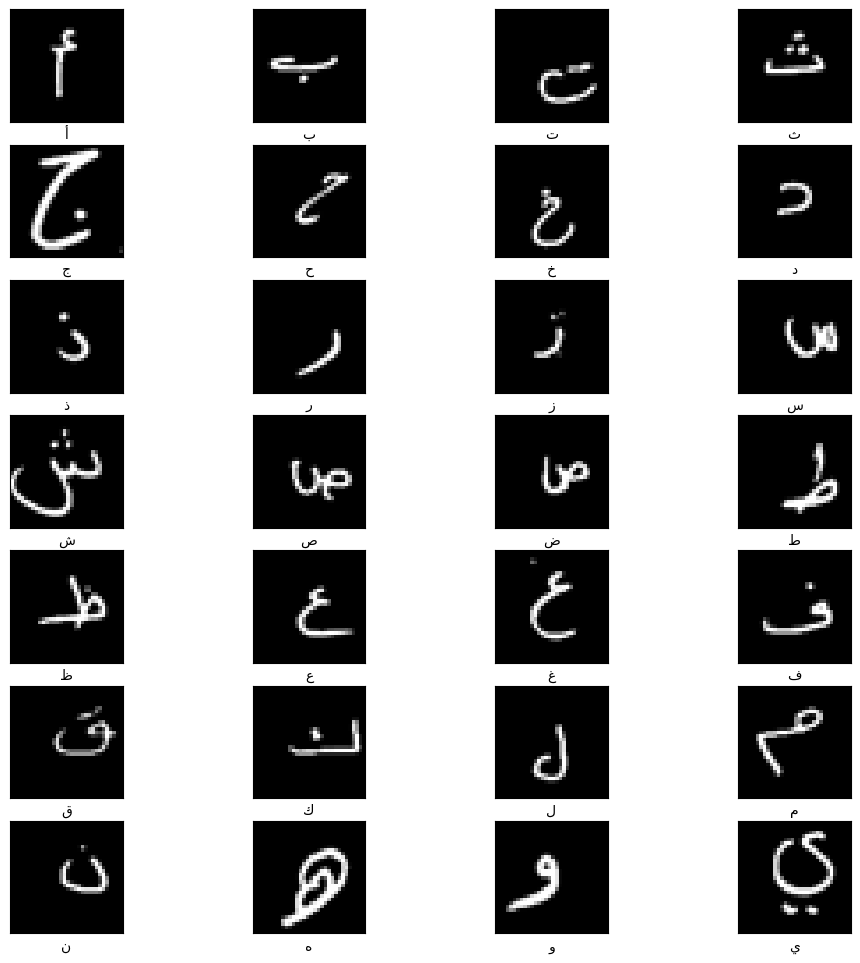

In [188]:
# Define the Arabic characters
arabic_characters = ["أ", "ب", "ت", "ث", "ج", "ح", "خ", "د", "ذ", "ر", "ز", "س", "ش", "ص", "ض", 
                     "ط", "ظ", "ع", "غ", "ف", "ق", "ك", "ل", "م", "ن", "ه", "و", "ي"]

unique_labels = np.unique(y_TraiN.argmax(axis=1))
num_images = len(unique_labels)

RANDOM_LIST = []
for label in unique_labels:
    # Find the indices of all images with this label
    indices = np.where(y_TraiN.argmax(axis=1) == label)[0]
    # Choose a random index from the list of indices
    random_index = np.random.choice(indices)
    # Add the random index to the list
    RANDOM_LIST.append(random_index)

plt.figure(figsize=(12,12))
for i in range(num_images):
    plt.subplot(7,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_Train[RANDOM_LIST[i]].reshape(32,32).T,"gray")
    plt.xlabel(arabic_characters[int(y_TraiN[RANDOM_LIST[i]].argmax())])


plt.show()

# Preparing the data


In [193]:
#reshaping for the model

x_train = X_train.reshape(-1,32,32,1)
x_test = X_test.reshape(-1,32,32,1)


In [194]:
# Convert the labels to one-hot vectors
num_classes = np.max(y_train) + 1
y_Train = keras.utils.to_categorical(y_train, num_classes)
y_Test = keras.utils.to_categorical(y_test, num_classes)


# Accuracy function

In [225]:
def evaluate_model(model, X_test, y_test):
    # Predict the labels for the test set using the trained model
    
    # Calculate the accuracy, precision, recall, and F1 score
    accuracy = accuracy_score(y_test, y_test)
    precision = precision_score(y_test, y_test, average='weighted')
    recall = recall_score(y_test, y_test, average='weighted')
    f1 = f1_score(y_test, y_test, average='weighted')
    
    # Return the evaluation metrics
    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1}

#  RNN Model

In [190]:
# Define the RNN model
model1 = keras.Sequential()
model1.add(layers.LSTM(128, input_shape=X_Train.shape[1:], return_sequences=True))
model1.add(layers.Dropout(0.2))
model1.add(layers.LSTM(128))
model1.add(layers.Dropout(0.2))
model1.add(layers.Dense(28, activation="softmax"))

# Compile the model
model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [191]:
# Print the model summary to show the mapping of the layers
model1.summary()

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_40 (LSTM)              (None, 32, 128)           82432     
                                                                 
 dropout_41 (Dropout)        (None, 32, 128)           0         
                                                                 
 lstm_41 (LSTM)              (None, 128)               131584    
                                                                 
 dropout_42 (Dropout)        (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 28)                3612      
                                                                 
Total params: 217,628
Trainable params: 217,628
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Train the model
model1.fit(X_Train, Y_train, batch_size=32, epochs=10, validation_data=(X_Test, Y_test))

# Evaluate the model on the test set
loss, accuracy = model1.evaluate(X_Test, Y_test)
print("Test loss:", loss)
print("Test accuracy:", accuracy)

In [138]:
predictions_for_model1= model1.predict(X_Test)

105/105 [==============================] - 3s 21ms/step


In [139]:
loss , acc = model1.evaluate(X_test,y_Test)
loss
acc

105/105 [==============================] - 2s 20ms/step - loss: 0.4079 - accuracy: 0.8652


0.8651785850524902

In [140]:
evaluation_results1 =evaluate_model(model1,predictions_for_model1,Y_test)
evaluation_results1

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}

In [141]:
accuracy_for_model1 = evaluation_results1['accuracy']
precision_for_model1  = evaluation_results1['precision']
recall_for_model1  = evaluation_results1['recall']
f1_score_for_model1  = evaluation_results1['f1_score']

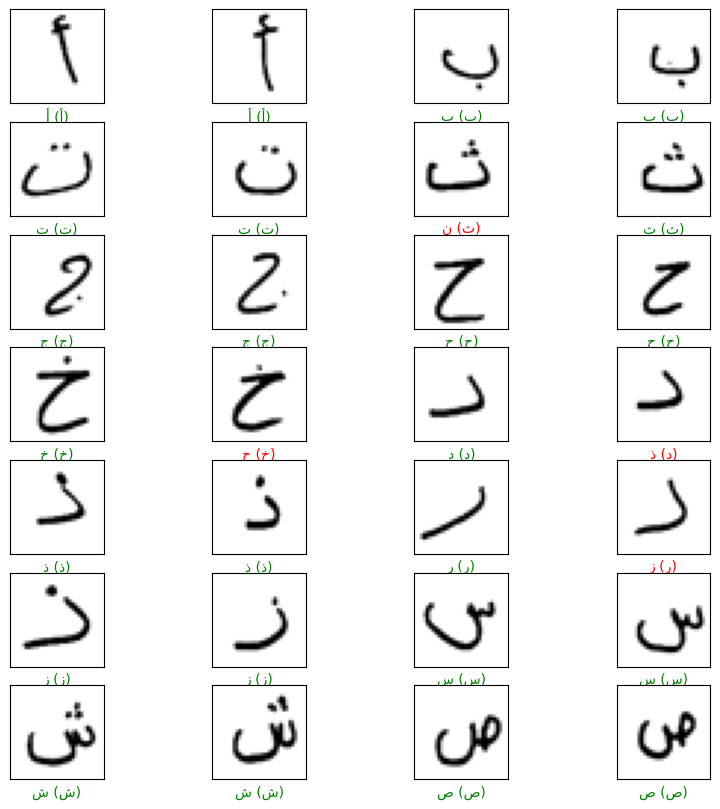

In [176]:
plt.figure(figsize=(10, 10))
for i in range(28):
    plt.subplot(7, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(32,32).T,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_for_model1[i])
    true_label = np.argmax(Y_test[i])
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("{} ({})".format(arabic_characters[predicted_label], arabic_characters[true_label]), color=color) # display alphabet letters
plt.show()

# CNN Model

In [ ]:
# Define the model architecture
model2 = keras.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(32, 32,1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(num_classes, activation="softmax")
])

# Compile the model
model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
model2.fit(x_train, y_Train, batch_size=32, epochs=15, validation_data=(x_test, y_Test))

In [169]:
predictions_for_model2= model2.predict(x_test)

105/105 [==============================] - 1s 7ms/step


In [170]:
loss , acc = model2.evaluate(x_test,y_Test)
loss
acc

105/105 [==============================] - 1s 7ms/step - loss: 0.5317 - accuracy: 0.9003


0.9002976417541504

In [174]:
evaluation_results2 =evaluate_model(model2,predictions_for_model2,y_Test)
evaluation_results2

C:\Users\abdal\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdal\New folder\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\abdal\New folder\lib\site-packages\sklearn\metrics\_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}

In [175]:
accuracy_for_mode2 = evaluation_results2['accuracy']
precision_for_model2  = evaluation_results2['precision']
recall_for_model2  = evaluation_results2['recall']
f1_score_for_model2  = evaluation_results2['f1_score']

# ANN Model

In [215]:
label_encoder = LabelEncoder()
train_labels = label_encoder.fit_transform(y_train)
test_labels = label_encoder.transform(y_test)

In [223]:
y_train = train_labels.ravel()
y_test = test_labels.ravel()

In [217]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
num_classes = len(np.unique(train_labels))
input_dim = X_train.shape[1]

In [218]:
model3 = Sequential()
model3.add(Dense(128, activation='relu', input_shape=(input_dim,)))
model3.add(BatchNormalization())
model3.add(Dense(256, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(128, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(num_classes, activation='softmax'))

In [219]:
optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [220]:
model3.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32)

Epoch 1/20
336/336 [==============================] - 2s 4ms/step - loss: 2.4529 - accuracy: 0.2815 - val_loss: 1.7142 - val_accuracy: 0.4435
Epoch 2/20
336/336 [==============================] - 1s 4ms/step - loss: 1.5222 - accuracy: 0.4982 - val_loss: 1.2961 - val_accuracy: 0.5644
Epoch 3/20
336/336 [==============================] - 1s 4ms/step - loss: 1.1824 - accuracy: 0.6001 - val_loss: 1.1509 - val_accuracy: 0.5938
Epoch 4/20
336/336 [==============================] - 1s 4ms/step - loss: 0.9956 - accuracy: 0.6525 - val_loss: 1.0575 - val_accuracy: 0.6112
Epoch 5/20
336/336 [==============================] - 1s 4ms/step - loss: 0.8591 - accuracy: 0.7037 - val_loss: 0.9925 - val_accuracy: 0.6499
Epoch 6/20
336/336 [==============================] - 1s 4ms/step - loss: 0.7222 - accuracy: 0.7441 - val_loss: 0.9512 - val_accuracy: 0.6663
Epoch 7/20
336/336 [==============================] - 1s 4ms/step - loss: 0.6380 - accuracy: 0.7766 - val_loss: 0.9459 - val_accuracy: 0.6797
Epoch 

In [224]:
test_loss, test_accuracy = model3.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

105/105 [==============================] - 0s 2ms/step - loss: 0.9937 - accuracy: 0.7327
Test Loss: 0.9937480092048645
Test Accuracy: 0.7327380776405334


In [226]:
predictions_for_model3= model3.predict(X_test)

105/105 [==============================] - 0s 2ms/step


In [227]:
evaluation_results3 =evaluate_model(model2,predictions_for_model3,y_Test)
evaluation_results3

{'accuracy': 1.0, 'precision': 1.0, 'recall': 1.0, 'f1_score': 1.0}

In [228]:
accuracy_for_mode3 = evaluation_results3['accuracy']
precision_for_model3 = evaluation_results3['precision']
recall_for_model3  = evaluation_results3['recall']
f1_score_for_model3  = evaluation_results3['f1_score']